 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/07/07.ipynb#Albert-A.-Michelson-a-data-z-jeho-měření-rychlosti-světla" data-toc-modified-id="Albert-A.-Michelson-a-data-z-jeho-měření-rychlosti-světla-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Albert A. Michelson a data z jeho měření rychlosti světla</a></span></li><li><span><a href="http://localhost:8888/notebooks/07/07.ipynb#Střední-chyba-průměru-a-velikost-vzorku" data-toc-modified-id="Střední-chyba-průměru-a-velikost-vzorku-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Střední chyba průměru a velikost vzorku</a></span></li><li><span><a href="http://localhost:8888/notebooks/07/07.ipynb#Interval-spolehlivosti" data-toc-modified-id="Interval-spolehlivosti-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Interval spolehlivosti</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/07/07.ipynb#Hustota-pravděpodobnosti" data-toc-modified-id="Hustota-pravděpodobnosti-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Hustota pravděpodobnosti</a></span></li><li><span><a href="http://localhost:8888/notebooks/07/07.ipynb#Distribuční-funkce" data-toc-modified-id="Distribuční-funkce-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Distribuční funkce</a></span></li><li><span><a href="http://localhost:8888/notebooks/07/07.ipynb#Kvantilová-funkce" data-toc-modified-id="Kvantilová-funkce-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Kvantilová funkce</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/07/07.ipynb#Určení-intervalu-spolehlivosti-Albertových-měření" data-toc-modified-id="Určení-intervalu-spolehlivosti-Albertových-měření-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Určení intervalu spolehlivosti Albertových měření</a></span></li><li><span><a href="http://localhost:8888/notebooks/07/07.ipynb#Interval-spolehlivosti-v-případě-neznámé-směrodatné-odchylky" data-toc-modified-id="Interval-spolehlivosti-v-případě-neznámé-směrodatné-odchylky-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Interval spolehlivosti v případě neznámé směrodatné odchylky</a></span></li><li><span><a href="http://localhost:8888/notebooks/07/07.ipynb#Interval-spolehlivosti-pro-lenochy" data-toc-modified-id="Interval-spolehlivosti-pro-lenochy-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Interval spolehlivosti pro lenochy</a></span></li></ul></div>

# Intervaly spolehlivosti

V této lekci si ukážeme, jak v R z vašich dat získat intervaly spolehlivosti pro populační průměr za předpokladu, že náhodná veličina má normální rozdělení. Normální rozdělení náhodné veličiny není vždy zaručené, a proto byste si to měli vždy nějak ověřit. Těmto metodám se však budeme věnovat až trochu později, potom co si probereme i testování statistických hypotéz.

## Albert A. Michelson a data z jeho měření rychlosti světla

Pokud se v reálném světě pokoušíte stanovit skutečnou hodnotu nějaké veličiny pomocí opakovaných měření, musíte se vždy potýkat s určitou experimentální chybou, která je v ideálním případě nesystematická a závisí pouze na náhodných jevech. Ve světě, ve kterém žijeme, se vám totiž bohužel nikdy nepovede naměřit stejnou hodnotu ve 100% případů. Jako příklad v této lekci nám bude sloužit experiment Alberta A. Michelsona, který se v roce 1879 pokoušel stanovit rychlost světla pomocí experimentu s [čočkou a jednoduchou soustavou dvou zrcadel](http://www.gutenberg.org/files/11753/11753-h/11753-h.htm). Měření několikrát opakoval a my máme jeho data k dispozici v souboru `michelson_velocitylight.csv`:

In [1]:
df_lightspeed <- read.table(
    "michelson_velocitylight.csv"
    , stringsAsFactors = F
    , header = T
)
head(df_lightspeed)

vellightair
850
740
900
1070
930
850


Čísla v tabulce jsou rychlosti světla v $\frac{km}{s}$, od kterých bylo odečteno číslo $299 \times 10^{3}$. Jelikož budeme najednou pracovat pouze s jednou proměnnou, nebotřebujeme v tomto případě objekt `data.frame`, ale vystačíme si pouze s vektorem:

In [2]:
lightspeed <- df_lightspeed$vellightair
class(lightspeed)

[1] "integer"

Pojďme se podívat, kolik měření Albert celkem provedl:

In [3]:
length(lightspeed)

[1] 100

Albert tedy provedl celkem 100 měření této náhodné veličiny. Skutečná rychlost světla by tedy měla v ideálním případě ležet někde v blízkosti průměru z těchto měření:

In [4]:
mean(lightspeed)

[1] 852.4

V jaké blízkosti bychom však měli skutečnou hodnotu čekat a s jakou pravděpodobností? Odpověď na tuto otázku získáme na konci této lekce. Nechme však teď Alberta na chvíli být a pojďme se podívat jak v praxi velikost našeho vzoruku ovlivňuje přesnost našeho odhadu.

## Střední chyba průměru a velikost vzorku

V následujícím příkladě jsme si pomocí funkce `rnorm` nasimulujeme dva vzorky různých velikostí (`x` a `x_big`) z populace s průměrem 32 a směrodatnou odchylkou 0.666:

In [5]:
x <- rnorm(30, mean = 42, sd = 0.666)
x_big <- rnorm(10000, mean = 42, sd = 0.666)

mean(x)
sd(x)
mean(x_big)
sd(x_big)

[1] 41.99344

[1] 0.6287367

[1] 41.99028

[1] 0.6660733

Průměr a směrodatná odchylka obou vzorků se tedy shruba blíží skutečnosti, ale přesnější výsledek jsme zřejmě získali s větším vzorkem, `x_big`.

Chybu, kterou při odhadu skutečného průměru uděláme, reprezentuje tzv. střední chyba průměru:

${\displaystyle {\text{SE}}_{\bar {x}}\ ={\frac {\sigma }{\sqrt {n}}}}$

Tato veličina vyjadřuje směrodatnou odchylku chyb při odhadu průměru normálního rozdělení se směrodatnou odchylkou $\sigma$. Jak je vidět, tak střední chyba průměru  klesá s počtem vzorků ($n$). To lze potvrdit i v našem simulovaném příkladě, kde si jej můžeme snadno spočítat:

In [6]:
0.666 / sqrt(length(x))
0.666 / sqrt(length(x_big))

[1] 0.1215944

[1] 0.00666

Opravdu tedy platí, že mnohem přesnější odhad získáme s použitím velkého vzorku. Všimněte si, že v tomto případě známe skutečnou směrodatnou odchylku v populaci ($\sigma$), a proto ji můžeme použít. Pokud bychom ji neznali, museli bychom ji odhadnout z našeho vzorku. Výpočtem intervalu spolehlivosti v takovém případě se věnuje [kapitola níže](#Interval-spolehlivosti-v-p%C5%99%C3%ADpad%C4%9B-nezn%C3%A1m%C3%A9-sm%C4%9Brodatn%C3%A9-odchylky). My se v další diskusi zatím zaměříme pouze na modelový příklad, ve kterém předchozí znalost $\sigma$ budeme předpokládat.

## Interval spolehlivosti

Vzhledem k tomu, že střední chyba průměru má normální rozdělení, lze interval spolehlivosti pro průměr definovat následujícím způsobem:

${\displaystyle \left({\bar {x}}-z^{*}{\sigma  \over {\sqrt {n}}},{\bar {x}}+z^{*}{\sigma  \over {\sqrt {n}}}\right)}$

$z$ zde tedy společně s daným znaménkem představuje násobek směrodatné odchylky (střední chyba průměru). Hodnota $z$ pochází z normalizovaného normálního rozdělení, tedy rozdělení s průměrem 0 a směrodatnou odchylkou 1. Tento násobek určuje  pravděpodobnost, že opravdová chyba průměru bude ležet v určitém intervalu. Tato pravděpodobnost vyplývá z hustoty pravděpodobnosti normálního rozdělení, kterou si představíme níže

### Hustota pravděpodobnosti

Hustotu pravděpodobnosti můžeme v R snadno vypočítat pro různé hodnoty násobků směrodatných odchylek pomocí funkce `dnorm` například následujícím způsobem:

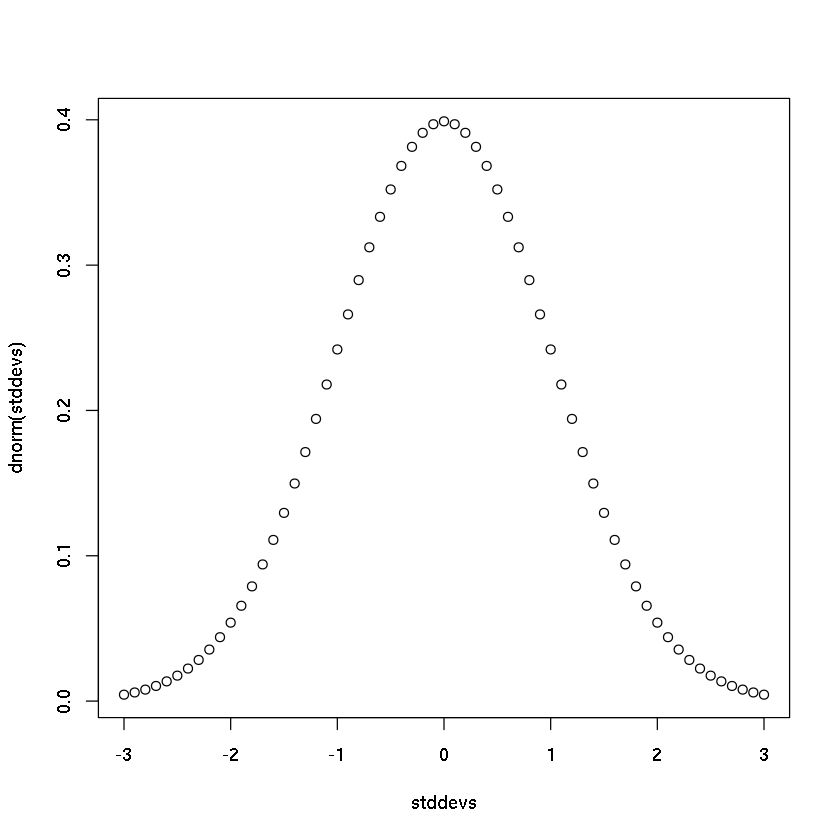

In [7]:
stddevs <- seq(-3, 3, 0.1) # násobek směrodatné dochylky
plot(stddevs, dnorm(stddevs))

Možné hodnoty směrodatných odchylek jsme tedy vynesli proti příslušným hodnotám hustoty pravděpodobnosti pomocí funkce `plot` a získali jsme tak obrázek, který se podobá typické Gaussovské křivce. Funkce `plot` je v R univerzální funkcí pro kreslení nejrůznějších grafů a podrobněji se jí budeme věnovat v jedné z dalších lekcí. Tato funkce akceptuje nespočet argumentů, které se týkají způsobu vizualizace nejrůznějších grafických elementů. V našem případě by bylo vhodné reprezentovat funkci jako křivku, čehož můžeme snadno docílit argumentem `type`:

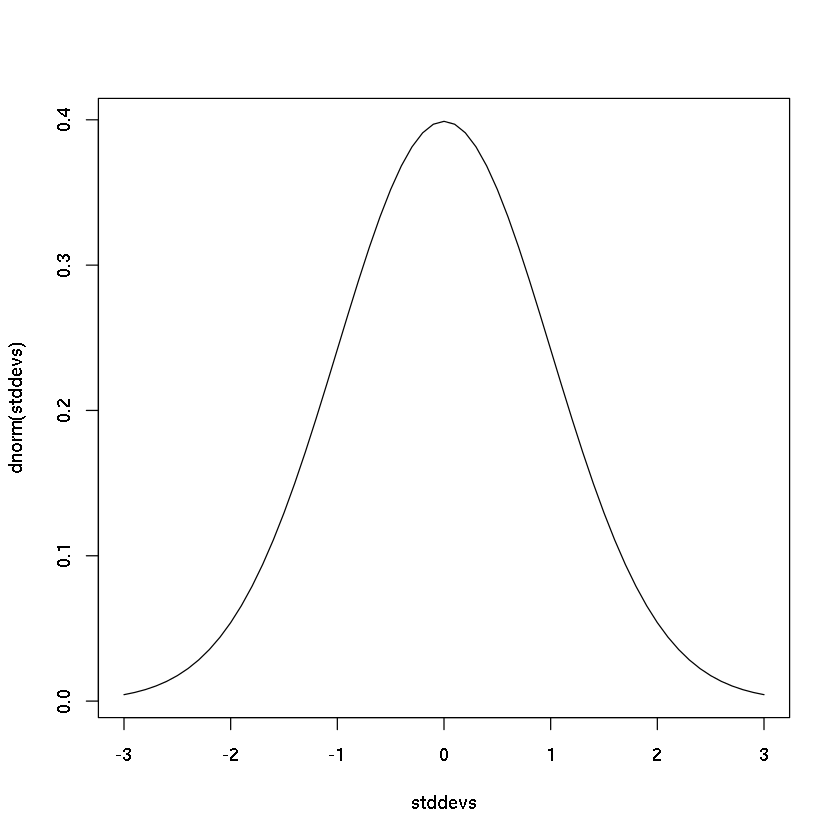

In [8]:
plot(stddevs, dnorm(stddevs), type = 'l')

Pro hustotu pravděpodonosti normálního rozdělení platí následující vztah:

$\Pr[a\leq X\leq b]=\int _{a}^{b}f_{X}(x)\,dx.$

Pravděpodobnost, že náhodná veličina $X$ nabývá hodnot v určitém intervalu od $a$ do $b$ (v našem případě rozsah možných chyb), je tedy dána integrálem hustoty pravděpodobnosti mezi body $a$ a $b$. Při odhadu našeho parametru tedy rozsah tohoto intervalu definuje pravděpodobnost, že uděláme chybu určité velikosti ($\pm z^{*}{\sigma  \over {\sqrt {n}}} $).

Pojďme teď ale trochu odbočit od statistiky a osvěžit is znalosti z matematiky a předchozích lekcí. a rychle vytvořit funkci pro jednoduchý výpočet určitého integrálu, abychom si mohli spočítat různé hodnty pravděpodobnosti pro různé intervaly. Můžeme tak učinit implementací lichoběžníkové metody, která určitý integrál funkce definuje takto:

${\displaystyle \int _{a}^{b}f(x)\,dx\approx \sum _{k=1}^{N}{\frac {f(x_{k-1})+f(x_{k})}{2}}\Delta x_{k}}$

Pokud platí:

${\displaystyle \Delta x_{k}=\Delta x={\frac {b-a}{N}}}$

lze tento vztah převést na:

${\displaystyle \int _{a}^{b}f(x)\,dx\approx {\frac {\Delta x}{2}}\sum _{k=1}^{N}\left(f(x_{k-1})+f(x_{k})\right)}$

${\displaystyle {}={\frac {\Delta x}{2}}(f(x_{0})+2f(x_{1})+2f(x_{2})+2f(x_{3})+\dotsb +2f(x_{N-1})+f(x_{N}))}$

což můžeme v R snadno naprogramovat:

In [9]:
integrate <- function(a, b, steps, func, ...) {
    # integrace funkce ("func") jedné proměnné a libovolným počtem argumentů 
    # v intervalu od "a" do "b" lichoběžníkovou metodou 
    # s určitým počtem kroků ("steps")
    
    if (a > b) stop("a > b") 
    
    dx <- (b - a) / steps
    y <- func(seq(a, b, dx), ...)
    
    0.5 * dx * (
        y[1] 
        + sum(2*y[c(-1, -length(y))]) 
        + y[length(y)]
    )
}

Že naše funkce funguje si můžeme snadno ověřit po dosazení známých empirických pravidel:

In [10]:
integrate(-1, 1, 100, dnorm) * 100
integrate(-1.96, 1.96, 100, dnorm) * 100
integrate(-3, 3, 100, dnorm) * 100

[1] 68.26734

[1] 94.99749

[1] 99.72922

Máme tak tedy například 95% jistotu, že násobek směrodatné odchylky chyb bude nabývat hodnot v intervalu $\left(-1.96, 1.96\right)$. Čili na 95% bude skutečná chyba v odhadu našeho průměru v intervalu $\left(-1.96^{*}{\sigma  \over {\sqrt {n}}}, 1.96^{*}{\sigma  \over {\sqrt {n}}}\right)$.

### Distribuční funkce

Ve statistice se též často používá tzv. distribuční funkce, která je definována následujícím způsobem:

$F_{X}(x)=\mathrm {Pr} [X\leq x]=\int _{-\infty }^{x}f_{X}(t)\,dt.$

Tato funkce je v R k disopozici pod názvem `pnorm`:

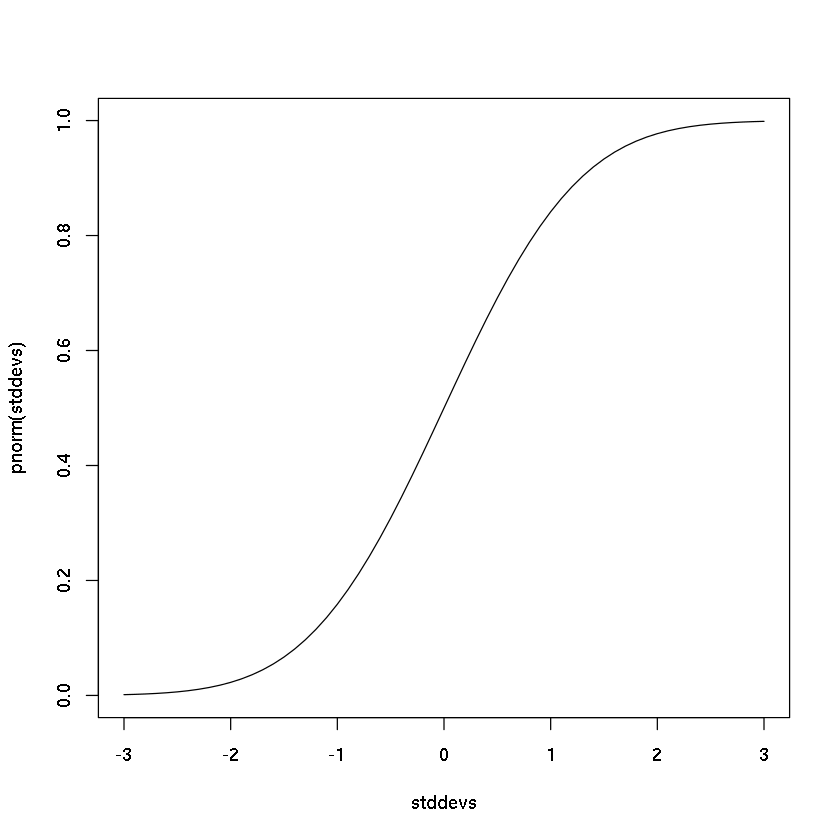

In [11]:
plot(stddevs, pnorm(stddevs), type = 'l')

a vrací tedy pravděpodobnost, že $z$ bude v intervalu $\left(-\infty, x\right)$. Pravděpodobnost, že naše chyba bude menší než $-1.96^{*}{\sigma  \over {\sqrt {n}}}$ je tedy:

In [12]:
pnorm(-1.96)

[1] 0.0249979

a naopak pravděpodobnost, že bude větší než $1.96^{*}{\sigma  \over {\sqrt {n}}}$ je potom:

In [13]:
1 - pnorm(1.96)

[1] 0.0249979

Obě pravděpodobnosti jsou tedy stejné, což vzhledem k symetrii normálního rozdělení nikoho nepřekvapí. 

Celková pravděpodobnost, že se dopustíme chyby v intervalu $\left(-1.96^{*}{\sigma  \over {\sqrt {n}}}, 1.96^{*}{\sigma  \over {\sqrt {n}}}\right)$, je pak tedy podle této funkce opět cca 95%:

In [14]:
1 - (pnorm(-1.96) + 1 - pnorm(1.96))

[1] 0.9500042

### Kvantilová funkce

V praxi se však nejčastěji používá inverzní funkce dané distribuční funkce, neboli též kvantilová funkce, která mapuje příslušné hodnoty pravděpodobnosti na konkrétní hodnoty standardní směrodatné odchylky, což je přesně to, co nás při určování intervalu spolehlivosti zajímá (hodnota $z$). V R je kvantilová funkce normálního rozdělení dostupná jako funkce `qnorm`:

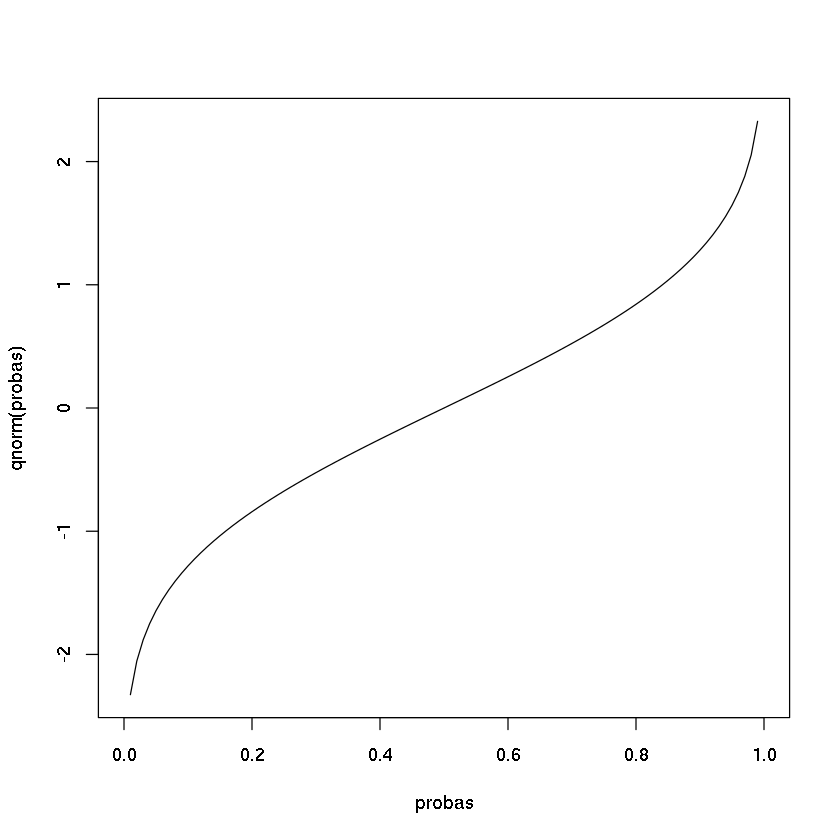

In [15]:
probas <- seq(0, 1, 0.01)
plot(probas, qnorm(probas), type = "l")

Počet odchylek pro interval spolehlivosti na 95% hladině pravděpodobnosti bychom tedy pomocí kvantilové funkce získali přímo takto:

In [16]:
qnorm(0.975)
qnorm(0.025)

[1] 1.959964

[1] -1.959964

Všimněte si, že díky symetrii normálního rozdělení jsou obě hodnoty stejné ale s opačným znaménkem. Ke zjištění samotné hodnoty $z$ v definici našeho intervalu ${\displaystyle \left({\bar {x}}-z^{*}{\sigma  \over {\sqrt {n}}},{\bar {x}}+z^{*}{\sigma  \over {\sqrt {n}}}\right)}$ tedy stačí vzít absolutní hodnotu jedné z nich.

## Určení intervalu spolehlivosti Albertových měření

Výpočet intervalu spolehlivosti na 95% hladině pravděpodobnosti pro rychlost světla v případě Albertových měření lze tedy například provést takto:

In [17]:
ls_mean <- mean(lightspeed)
ls_sd <- sd(lightspeed)
ls_sem <- ls_sd / sqrt(length(lightspeed)) # odhad skutečné směrodatné odchylky

c(
    ls_mean - qnorm(0.975) * ls_sem
    , ls_mean + qnorm(0.975) * ls_sem
)

[1] 836.9142 867.8858

Výsledkem této analýzy by tedy bylo, že na 95% hladině pravděpodobnosti leží skutečná naměřená rychlost světla touto metodou ve vzduchu v intervalu $\left(836.91, 867.89\right)$ (pozn: světlo je ve vzduchu ve skutečnosti o něco pomalejší a "správná hodnota" by v tomto případě byla [734.5](http://darp.lse.ac.uk/PapersDB/Stigler_&#40;AnnStat_77&#41;.pdf), tedy mimo Albertův interval). Neznámou hodnotu $\sigma$ jsme v tomto případě nahradili odhadem pomocí směrodatné odchylky ze vzorku. V tomto případě si to můžeme dovolit, ale takováto aproximace nemusí vždy být dostatečně přesná. Jak se v takovém případě zachovat, si řekneme v následující kapitole.

## Interval spolehlivosti v případě neznámé směrodatné odchylky

Pokud hodnotu $\sigma$ neznáme, musíme ji odhadnout a tuto skutečnost reflektovat i v našem výpočtu. Musíme totiž vzít do úvahy i chybu, které se při takové aproximaci dopustíme. V takovém případě totiž naše chyba nepochází z normální distribuce ale má studentovo t-rozdělení, které závisí na počtu vzorků (stupně volnosti rozdělení). V tomto případě je tedy interval spolehlivosti definován takto:

${\displaystyle \left({\bar {x}}-t^{*}{s  \over {\sqrt {n}}},{\bar {x}}+t^{*}{s  \over {\sqrt {n}}}\right)}$

V R máme stejně jako v případě normálního rozdělení k dispozici analogické funkce i pro práci s t-rozdělením. Jsou to `rt`, `dt`, `pt` a `qt`. Hustotu pravděpodobnosti si tedy pro t-rozdělení s různými hypotetickými velikostmi vzorku můžeme zobrazit takto:

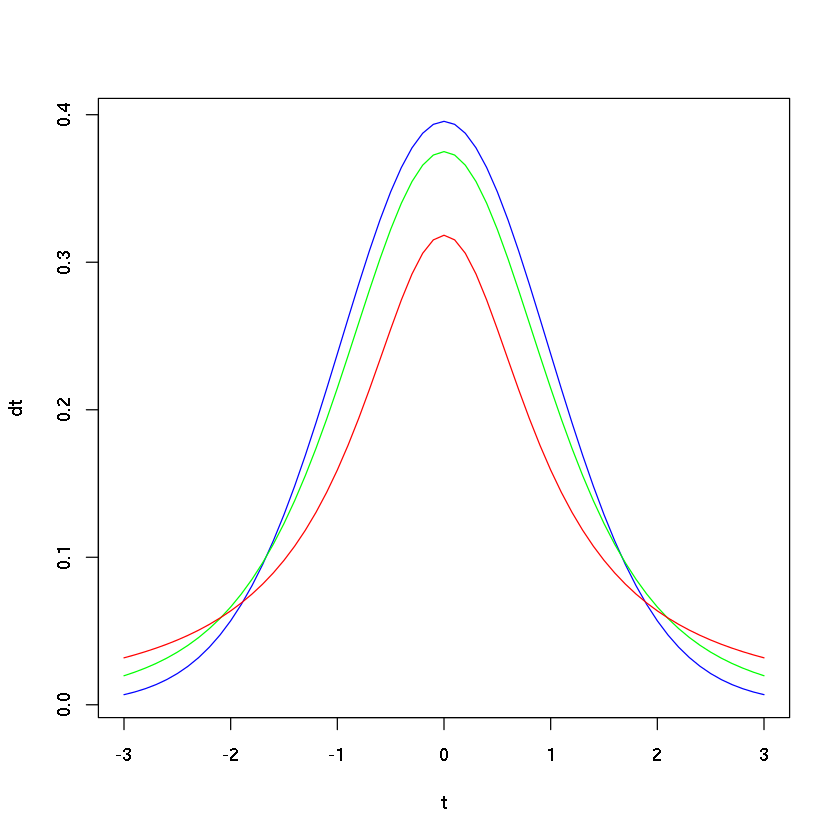

In [18]:
t <- seq(-3, 3, 0.1)

plot(t, dt(t, df = 29), col = 'blue', type = 'l', ylab = "dt") # 30 měření
lines(t, dt(t, df = 4), col = 'green') # 5 měření
lines(t, dt(t, df = 1), col = 'red') # 2 měření

Počet stupňů volnosti v t-distribuci se odvíjí od počtu měření ve vzorku a je roven počtu vzorků sníženému o jedničku. V našem kódu tedy simulujeme tři vzorky, ve kterých došlo po řadě ke dvěma, pěti a třiceti měřením a příslušné hustoty pravděpodobnosti jsme si pak zobrazili v jednom grafu. Všimněte si, že pro vzorky s nižším počtem měření je křivka mnohem širší a výsledný interval spolehlivosti tak tedy bude při konstantní hladině pravděpodobnosti pro tyto vzorky mnohem více "rozkročený".

Ukázali jsme si zde též způsob jak v R vykreslit do jednoho grafu více závislostí najednou. Pomocí funkce `plot` se totiž vždy vytvoří nejen konkrétní graf ale též kreslící plocha, na kterou lze pak dále přidávat nejrůznější objekty. My jsme v našem případě použili funkci `lines` pro přidání dalších křivek různých barev. Všimněte si též argumentu `ylab` funkce `plot`, kterým jsme definovali popisek osy `y`. Mimo tento argument akceptuje funkce `plot` i další. Například parametr `xlab` umožní pojmenování osy `x` a parametr `main` pak slouží ke vložení nadpisu celého grafu (viz příklad níže).

Důvodem, proč jsme si v předchozím praktickém příkladě s Albertovými měřeními mohli dovolit použít normální distribuci místo t-rozdělení, je díky tomu, že se zvyšujícími stupni volnosti se t-distribuce limitně blíží té normální. Tuto vlastnost ilustruje následující graf:

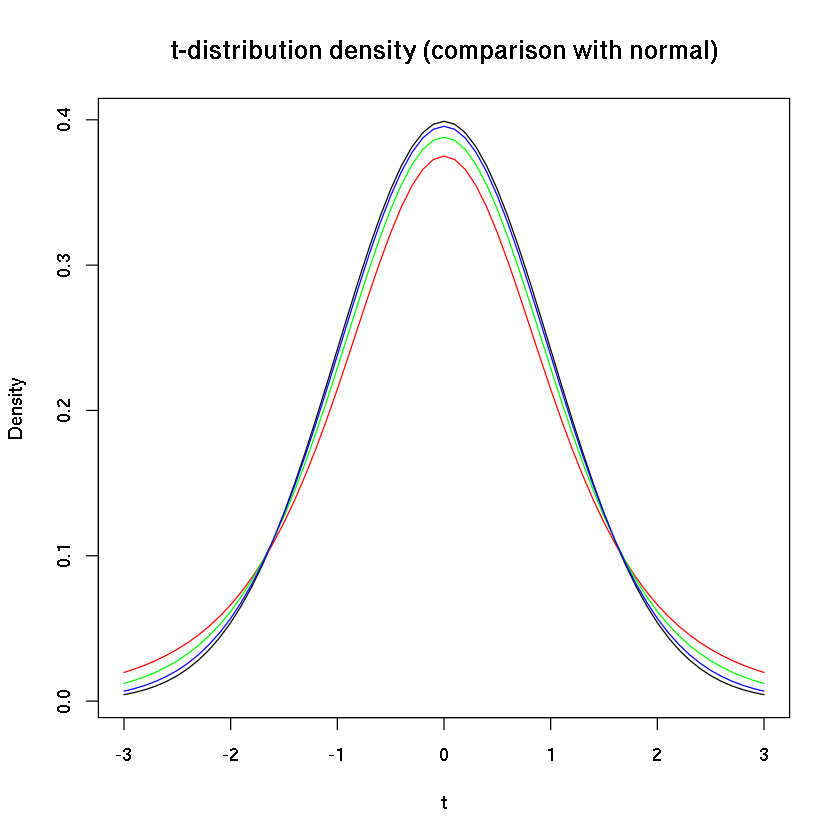

In [19]:
plot(
    t
    , dnorm(t)
    , col = 'black'
    , type = 'l'
    , main = "t-distribution density (comparison with normal)"
    , ylab = "Density"
)
lines(t, dt(t, df = 4), col = 'red')
lines(t, dt(t, df = 9), col = 'green')
lines(t, dt(t, df = 29), col = 'blue')

Je tedy vidět, že již při provedení třiceti měření (modrá křivka), je t-distribuce již velice blízká té Gaussovské, a proto není velký rozdíl zda použijete klasickou definici nebo studentovo t-rozdělení. Interval spolehlivosti bude v případě Albertova měření rychlosti světla v podstatě identický s tím, který jsme stanovili nahoře:

In [20]:
ls_mean <- mean(lightspeed)
ls_sd <- sd(lightspeed)
ls_sem <- ls_sd / sqrt(length(lightspeed)) # odhad skutečné směrodatné odchylky

c(
    ls_mean - qt(0.975, df = length(lightspeed) - 1) * ls_sem
    , ls_mean + qt(0.975, df = length(lightspeed) - 1) * ls_sem
)

[1] 836.7226 868.0774

tedy $\left(836.72, 868.07\right)$ oproti $\left(836.91, 867.89\right)$, což opravdu představuje minimální rozdíl. Všimněte si, že interval spolehlivosti s použitím funkce `qt` je též skutečně o něco málo širší než původní interval, což je dáno právě tvarem studentova t-rozdělení pro tento počet měření.

## Interval spolehlivosti pro lenochy

V další lekci si probereme krátký ůvod do testování statistických hypotéz. Zmíníme si tam též funkci `t.test`, která umožňuje testovaní nejrůznějších hypotéz o populačním průměru a implicitně interval spolehlivosti počítá. Získat interval spolehlivosti na 95% úrovni pravděpodonosti je s touto funkcí tedy záležitost na dva řádky:

In [21]:
output <- t.test(lightspeed, conf.level = 0.95)
output$conf.int

[1] 836.7226 868.0774
attr(,"conf.level")
[1] 0.95